In [54]:
import pandas as pd
import requests
import json
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import gensim
from wordcloud import WordCloud

In [2]:
##Making a request to the api in order to get data and viewing the first item that it returns
quotes_data = 'https://officeapi.dev/api/quotes/'

response = requests.request("GET", quotes_data)

response.text

data = response.json()
data['data'][0]

{'_id': '5e9664cff87ac15464c55f1b',
 'content': 'If I had a gun with two bullets and I was in a room with Hitler, Bin Laden, and Toby, I would shoot Toby twice.',
 'character': {'_id': '5e93b4a43af44260882e33b0',
  'firstname': 'Michael',
  'lastname': 'Scott',
  '__v': 0},
 '__v': 0}

In [3]:
data['data'][0]['character']['firstname']

'Michael'

In [4]:
len(data['data'])

40

In [5]:
##Loop that goes through data
#appends to a list

quotes = []
first = []
last = []

for i in range(40):
    q = data['data'][i]['content']
    quotes.append(q)
    
    f = data['data'][i]['character']['firstname']
    first.append(f)
    
    l = data['data'][i]['character']['lastname']
    last.append(l)
     
len(first)

40

In [6]:
##Creating dataframes from each of the lists, then combining them to create one 

quotes_df = pd.DataFrame(quotes, columns = ['quote'])
firstname_df = pd.DataFrame(first, columns = ['firstname'])
lastname_df = pd.DataFrame(last, columns = ['lastname'])

quote = pd.concat([firstname_df, lastname_df, quotes_df], axis = 1)
quote.head(1)

,firstname,lastname,quote
0,Michael,Scott,If I had a gun with two bullets and I was in a...


In [7]:
##Getting episode data
#Same process as before

episodes_data = 'https://officeapi.dev/api/episodes/'

response = requests.request("GET", episodes_data)

response.text

data2 = response.json()
data2['data'][0]

{'_id': '5e94d646f733a1332868e1dc',
 'title': 'Pilot',
 'description': 'A documentary crew gives a firsthand introduction to the staff of the Scranton branch of the Dunder Mifflin Paper Company, managed by Michael Scott.',
 'writer': {'_id': '5e95242f9511994a07f9a319',
  'name': 'Greg Daniels',
  'role': 'Writer/Director',
  '__v': 0},
 'director': {'_id': '5e9523649511994a07f9a313',
  'name': 'Ken Kwapis',
  'role': 'Director',
  '__v': 0},
 'airDate': '2005-03-24T06:00:00.000Z',
 '__v': 0}

In [8]:
len(data2['data'])

28

In [9]:
episode_desc = []
title = []
for i in range(28):
    e = data2['data'][i]['description']
    episode_desc.append(e)
    
    t = data2['data'][i]['title']
    title.append(t)

In [10]:
ep_df = pd.DataFrame(episode_desc, columns = ['description'])
title_df = pd.DataFrame(title, columns = ['title'])

episode = pd.concat([title_df, ep_df], axis = 1)
episode.head(1)

,title,description
0,Pilot,A documentary crew gives a firsthand introduct...


In [11]:
##Puts all the text in a list 

quote_data = quote['quote'].copy()
ep_data = episode['description'].copy()
text_data = []
for i in quote_data:
    text_data.append(i)

for i in ep_data:
    text_data.append(i)
str_data = str(text_data)

In [12]:
##beginning to use nltk, breaking the data into tokens
#then make all the words lower case
#then remove the punctation, so just the words are left

str_data_l = str_data.lower()
series = pd.Series(nltk.word_tokenize(str_data_l))
str_words = series[series.str.contains('[a-zA-Z0-9]')]
str_words

1           'if
2             i
3           had
4             a
5           gun
         ...   
2026        and
2027    michael
2028        has
2029        two
2030      dates
Length: 1601, dtype: object

In [13]:
##Looking at stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
##removing stopwords
#Source for code: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
filter_words = [i for i in str_words if not i in stopwords]
filter_words = []

for i in str_words:
    if i not in stopwords:
        filter_words.append(i)

In [15]:
##Seeing what the most common words are
#Followed tutorial: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

freq = FreqDist(filter_words)
freq.most_common(5)

[("'s", 28), ('michael', 26), ('office', 14), ('like', 13), ('dwight', 9)]

In [16]:
##Most common is the 's, so I'm going to remove it using list comprehension
#Source of code: https://stackoverflow.com/questions/1157106/remove-all-occurrences-of-a-value-from-a-list

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

filtered_words = remove_values_from_list(filter_words, '\'s')
filtered_words = remove_values_from_list(filtered_words, 'n\'t')
filtered_words = remove_values_from_list(filtered_words, '\'m')

In [17]:
##this is better

freq = FreqDist(filtered_words)
freq.most_common(5)

[('michael', 26), ('office', 14), ('like', 13), ('dwight', 9), ('know', 8)]

In [18]:
##comparing the most common words before stopwords were remvoved
#appears to be a smart move to have removed the stopwords

freq2 = FreqDist(str_words)
freq2.most_common(5)

[('i', 61), ('a', 61), ('the', 50), ('to', 45), ('and', 36)]

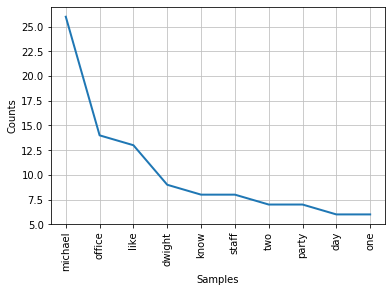

In [19]:
##Making a visualization of the most common words

i = FreqDist(filtered_words)

i.plot(10,cumulative=False)
plt.show()

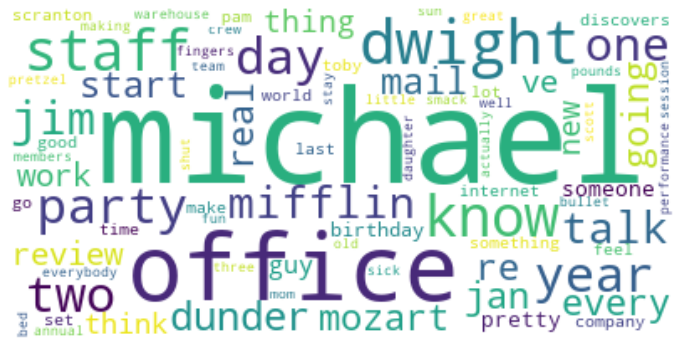

In [65]:
##Going to create a wordCLoud
#resource: https://www.datacamp.com/community/tutorials/wordcloud-python

##Function joins together a list of strings to a single string
def listToString(s):  
    st = " "    
    return (st.join(s))    
## Source: https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

##Function creates the word cloud
#passed in the similar words, append the 1st element to a list
#converts the list of strings to a single string, in order to make the word cloud

def makeWordCloud(data):
    l = []
    for i in data:
        l.append(i)
    l_str = listToString(l)
   
    word = WordCloud(background_color = "white", min_font_size = 7).generate(l_str)
    plt.figure(figsize = (12,12))
    plt.imshow(word, interpolation='bilinear')
    plt.axis("off")

makeWordCloud(filtered_words)


In [67]:
##Practing Parts of Speech tagging with the top 5 most common words
#Code is commented out because the response is long

nltk.pos_tag(filtered_words[:15])

[('six', 'CD'),
 ('like', 'IN'),
 ('guy', 'NN'),
 ("'michael", 'POS'),
 ('turtle', 'NN'),
 ('crew', 'VBD'),
 ('old', 'JJ'),
 ('pretty', 'JJ'),
 ('start', 'NN'),
 ('shoots', 'NNS'),
 ('year', 'NN'),
 ('office', 'NN'),
 ('get', 'NN'),
 ('warehouse', 'IN'),
 ('one', 'CD')]

In [27]:
##Creating a word2vec training model

office_model = gensim.models.Word2Vec([filtered_words], min_count = 1)

In [42]:
##Using the model to see what words are most similar to the
# most common words, from above 

office_model.wv.most_similar(positive = ['michael'], topn = 5)

[('well', 0.2859787940979004),
 ('real', 0.28292644023895264),
 ('paper', 0.2815932035446167),
 ('injury', 0.2664094567298889),
 ('screenplay', 0.2493065744638443)]

In [32]:
office_model.wv.most_similar('office', topn = 5)

[('dundies', 0.3092764616012573),
 ('mouth', 0.30594688653945923),
 ('karaoke', 0.30524522066116333),
 ('boss', 0.24699154496192932),
 ('hosts', 0.2425968050956726)]

In [33]:
office_model.wv.most_similar('dwight', topn = 5)

[('firsthand', 0.39116013050079346),
 ('room', 0.3273814916610718),
 ('starts', 0.3167698383331299),
 ('grill', 0.2946418225765228),
 ('sending', 0.2940952479839325)]

In [41]:
office_model.wv.similarity(w1 = 'jim', w2 = 'dwight')

0.18733042

In [43]:
office_model.wv.doesnt_match(['michael', 'jim', 'dwight'])

C:\Users\matt\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'michael'

Makes sense because Michael is the manager, and Dwight and Jim are both work in sales

In [68]:
office_model.wv.doesnt_match(['office', 'party', 'warehouse'])

'office'